# Libraries.

In [1]:
# Essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Model Building
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()
mm = MinMaxScaler()

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle Competitions/Fraud Detection/transaction_dataset.csv')

In [4]:
# Removing leading/trailing whitespaces for tidyness.
df.columns = [i.strip().lower() for i in df.columns]

# Removing unnecessary columns.
df.drop(columns = ['unnamed: 0', 'index'], axis = 1, inplace = True)

# Missing Values.

## Pre-imputation.

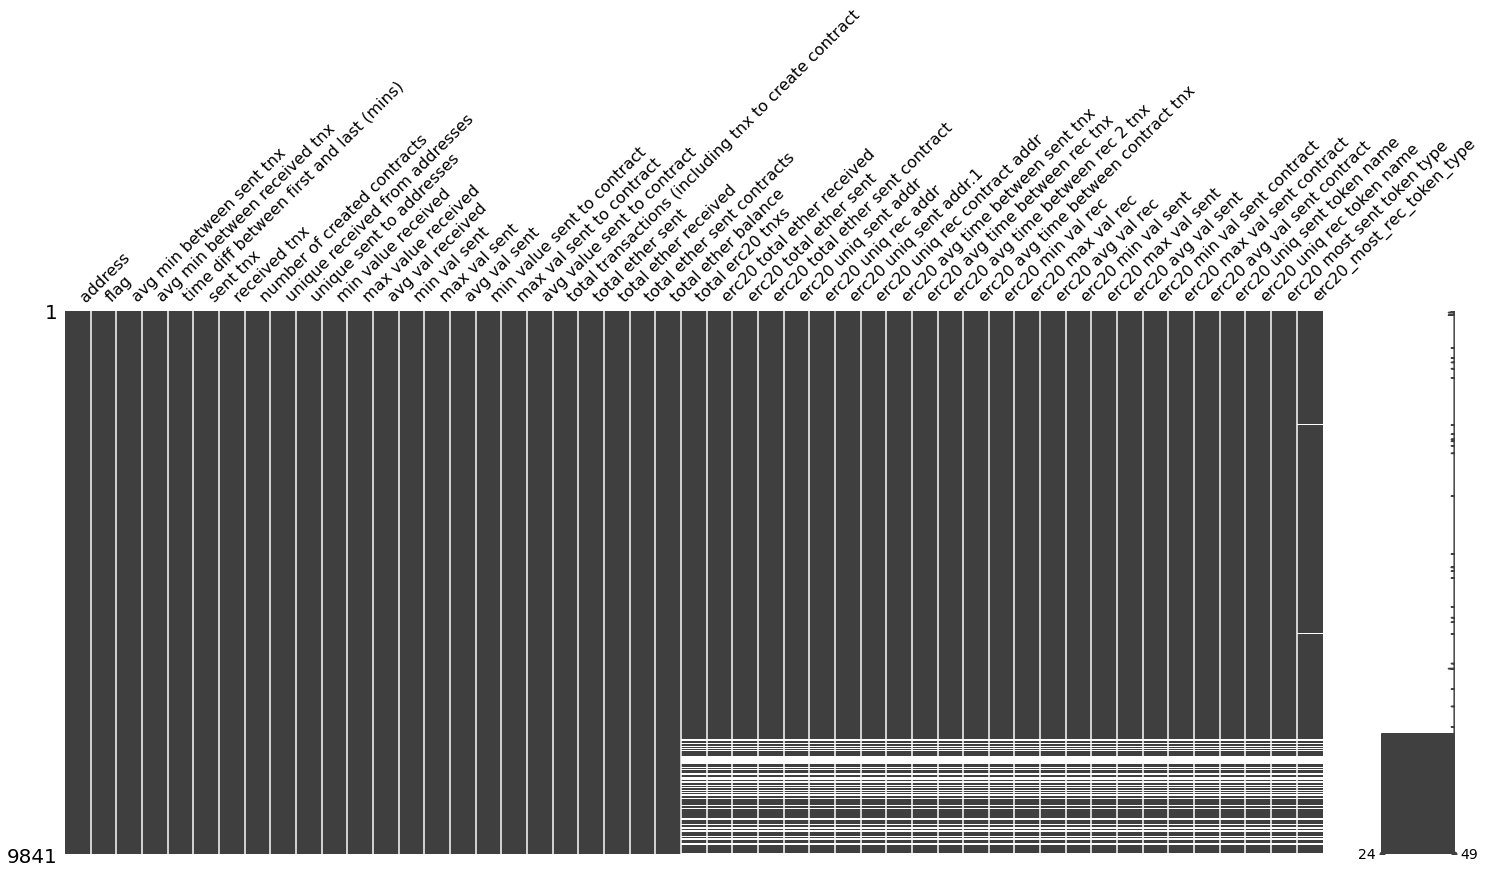

In [5]:
msno.matrix(df)
plt.show()

In [6]:
# Separation of numerical and categorical data.
numericals = [i for i in df.columns if df[i].dtype != 'object' if i != 'FLAG']

# Imputing with the column's mean.
df = df[numericals].fillna(df[numericals].mean())

## Post imputation.

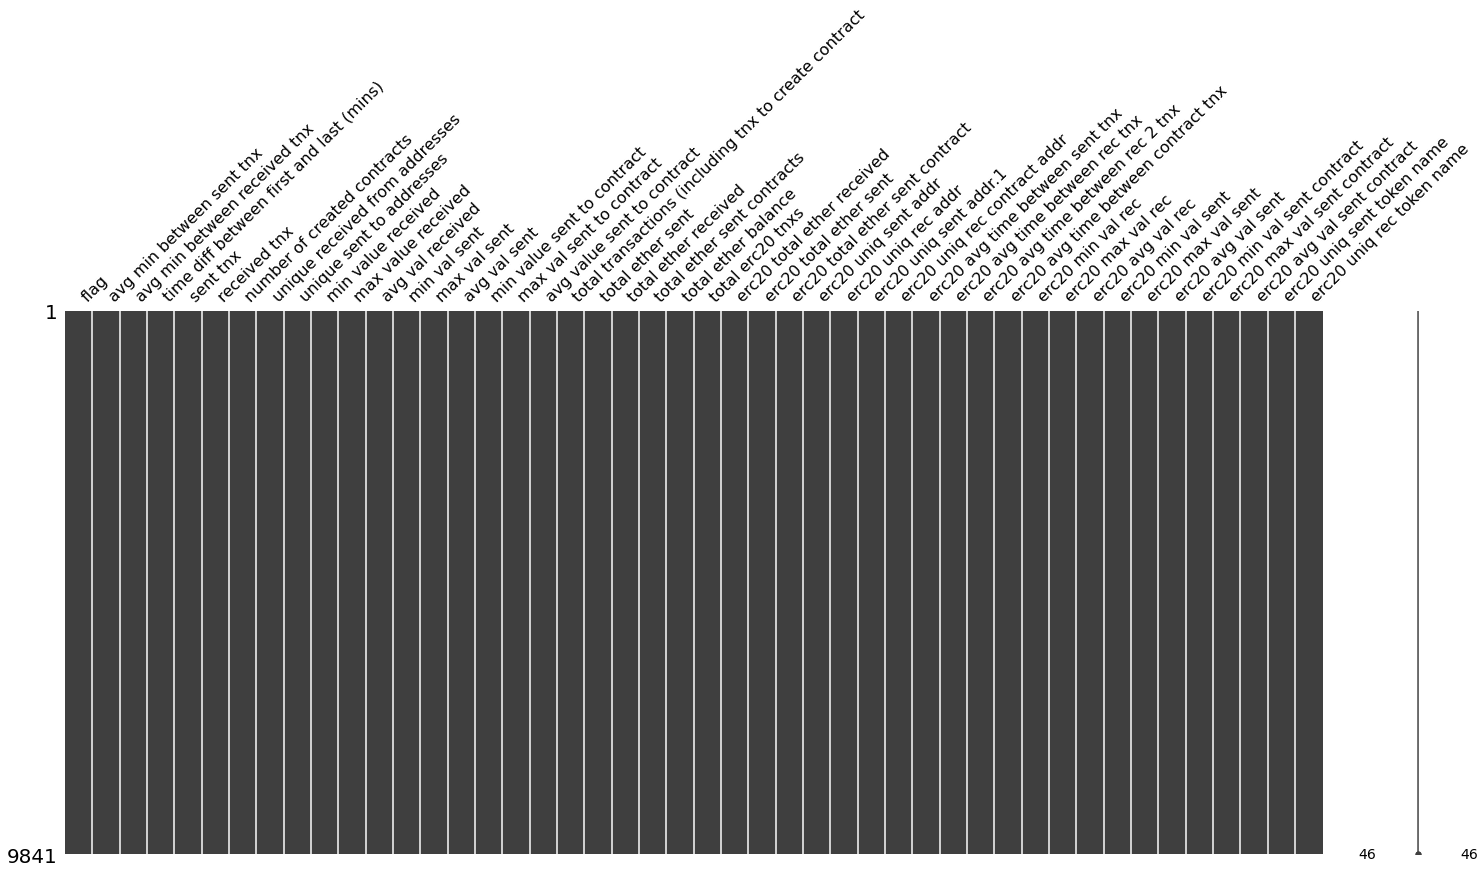

In [7]:
# Checking if the imputation was successful.
msno.matrix(df)
plt.show()

# Correlation.

In [8]:
# Removing columns that have 0 variance.
cols = [i for i in df.columns if df[i].var() > 0]
df = df[cols]

## Pre-filtering.

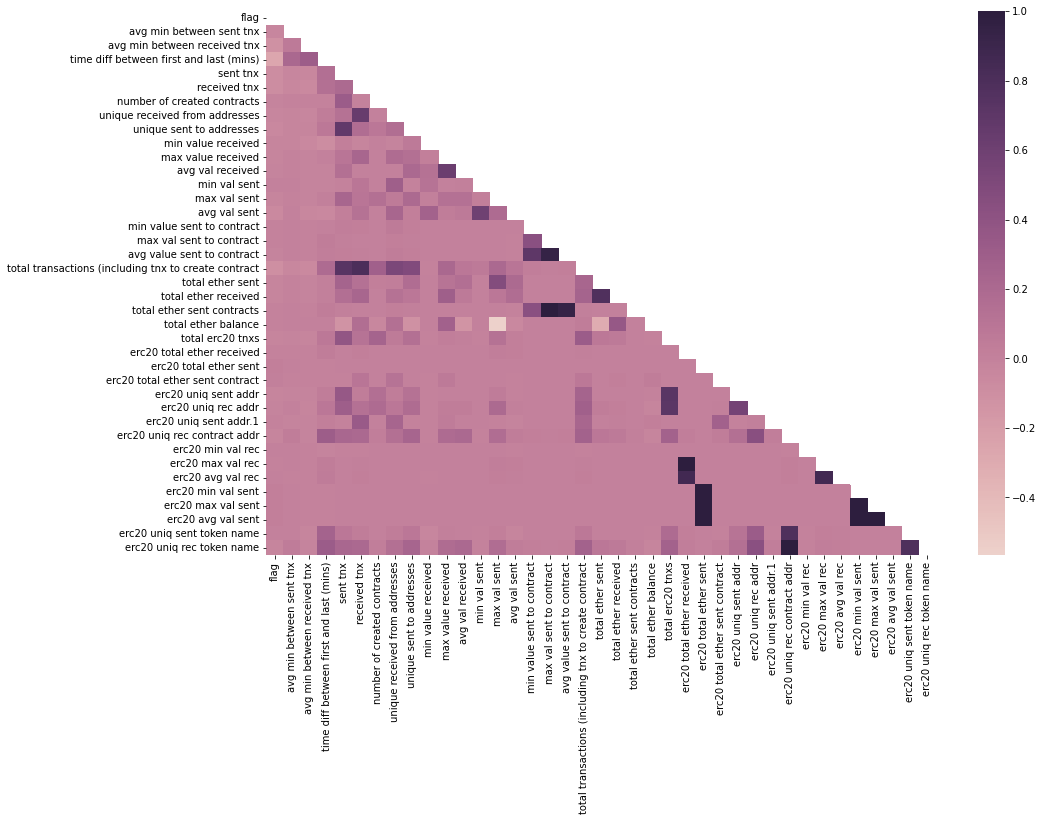

In [9]:
plt.figure(figsize = (15, 10))

# Generating the correlation matrix of the dataframe.
corr = df.corr()

# Retrieving the matrix's upper diagonal.
mask = np.triu(corr)

# Converting the matrix to a heatmap, and masking the upper diagonal.
sns.heatmap(corr, annot = False, mask = mask, cmap = sns.cubehelix_palette(as_cmap=True))
plt.show()

## Filtering columns with high correlation.

In [10]:
# Filtering the columns that are highly correlated.
filt_corr = corr[corr > 0.6].dropna(axis = 1 ,thresh = 3)

# Removing the diagonal elements.
filt_corr = filt_corr[filt_corr != 1]

# Filtering the matrix to only keep the interactions that have a score of higher than 0.85.
to_drop = filt_corr[filt_corr > 0.85]
to_drop.values[to_drop.values > 0]

# Sorting the columns by their correlation score.
to_drop.unstack().sort_values(kind = "quicksort")[to_drop.unstack() > 0]

erc20 avg val rec             erc20 max val rec               0.859766
erc20 max val rec             erc20 avg val rec               0.859766
erc20 total ether received    erc20 avg val rec               0.859822
erc20 avg val rec             erc20 total ether received      0.859822
max val sent to contract      avg value sent to contract      0.949607
avg value sent to contract    max val sent to contract        0.949607
                              total ether sent contracts      0.949608
total ether sent contracts    avg value sent to contract      0.949608
erc20 min val sent            erc20 total ether sent          0.999311
erc20 total ether sent        erc20 min val sent              0.999311
erc20 avg val sent            erc20 total ether sent          0.999566
erc20 total ether sent        erc20 avg val sent              0.999566
erc20 uniq rec token name     erc20 uniq rec contract addr    0.999642
erc20 uniq rec contract addr  erc20 uniq rec token name       0.999642
erc20 

In [11]:
# Dropping the highly-correlated columns.
df.drop(columns = to_drop.keys().tolist(), inplace = True)

## Post-filtering.

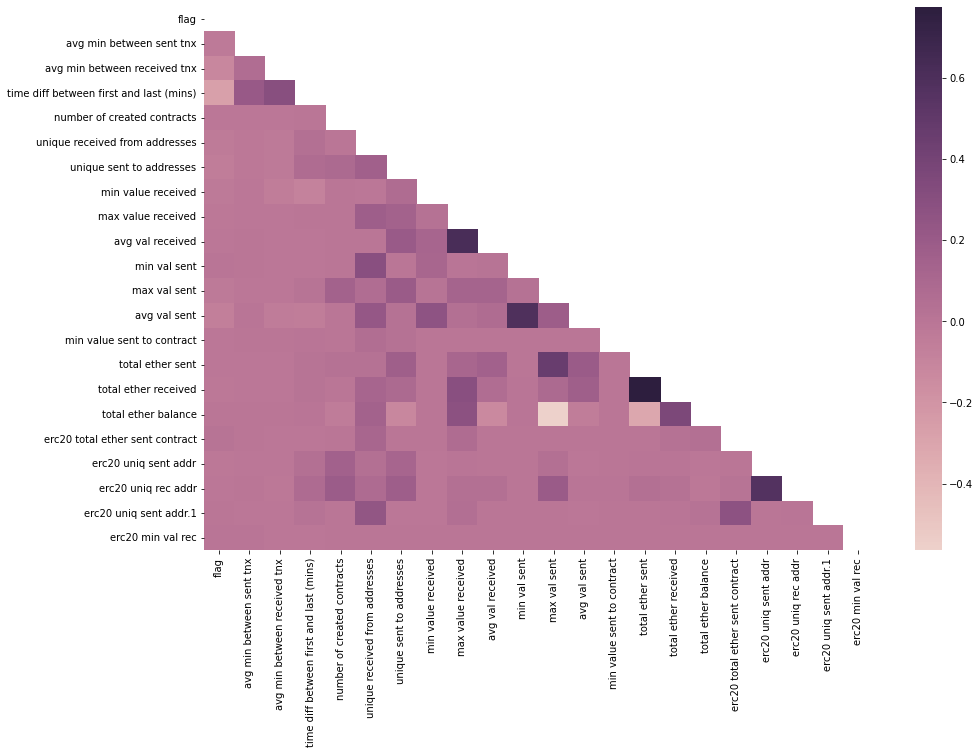

In [12]:
plt.figure(figsize = (15, 10))

# Generating the correlation matrix of the dataframe.
corr = df.corr()

# Retrieving the matrix's upper diagonal.
mask = np.triu(corr)

# Converting the matrix to a heatmap, and masking the upper diagonal.
sns.heatmap(corr, annot = False, mask = mask, cmap = sns.cubehelix_palette(as_cmap=True))
plt.show()

# Outlier Removal.

In [13]:
# Separating into positive and negative cases.
positiveCases = df[df['flag'] == 1]
negativeCases = df[df['flag'] == 0]

In [14]:
def JitterBoxPlot(n):
  
  # Cosmetics.
  plt.figure(figsize = (8, 6))
  sns.set(style = 'darkgrid')

  # Boxplot.
  sns.boxplot(data = [negativeCases[df.columns[n]], positiveCases[df.columns[n]]])
  # Strip plot.
  sns.stripplot(data = [negativeCases[df.columns[n]], positiveCases[df.columns[n]]], marker = "o", alpha = 0.3, color = "blue")
  
  # Title.
  plt.title(df.columns[n].title())
  plt.show()

  # Return the name of the column.
  return df.columns[n]

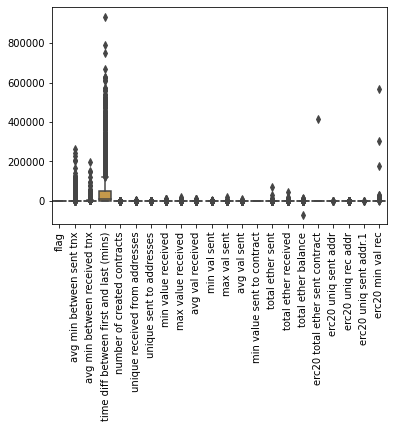

In [15]:
# Generating the basic boxplot of all columns to get a visual picture.
g = sns.boxplot(data = positiveCases)

# Rotating the labels by 90 degrees for readability.
plt.xticks(rotation = 90)
plt.show()

## ERC20 Min Val Rec.

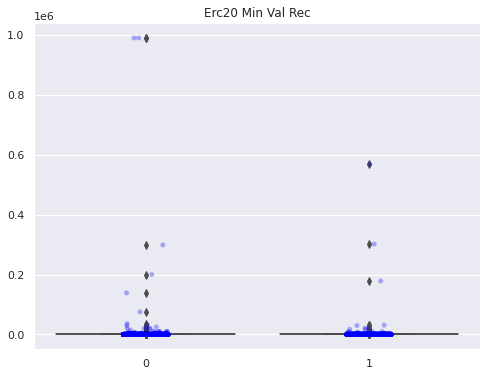

'erc20 min val rec'

In [16]:
JitterBoxPlot(21)

In [17]:
print(positiveCases.shape, negativeCases.shape)

q1, q3 = np.percentile(positiveCases['erc20 min val rec'], [25, 75])
iqr = q3 - q1
upper = q3 + 1.5*iqr
positiveCases = positiveCases[positiveCases['erc20 min val rec'] <= upper]

q1, q3 = np.percentile(negativeCases['erc20 min val rec'], [25, 75])
iqr = q3 - q1
upper = q3 + 1.5*iqr
negativeCases = negativeCases[negativeCases['erc20 min val rec'] <= upper]

positiveCases.shape, negativeCases.shape

(2179, 22) (7662, 22)


((2156, 22), (6295, 22))

## ERC20 Uniq Sent Addr.

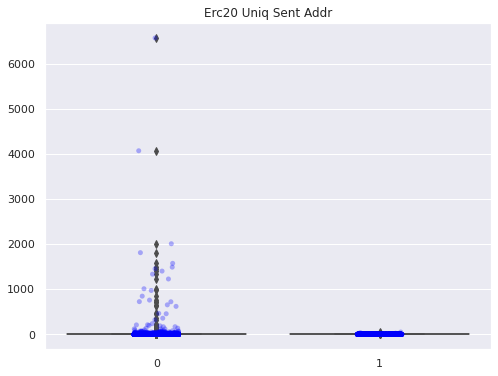

'erc20 uniq sent addr'

In [18]:
JitterBoxPlot(18)

In [19]:
print(positiveCases.shape, negativeCases.shape)

negativeCases = negativeCases[negativeCases['erc20 uniq sent addr'] <= 3000]

positiveCases.shape, negativeCases.shape

(2156, 22) (6295, 22)


((2156, 22), (6293, 22))

## ERC20 Total Ether Sent Contract.

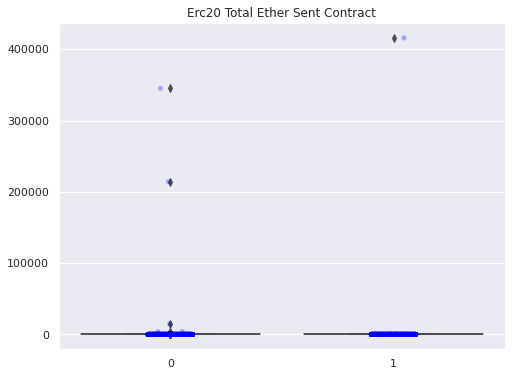

'erc20 total ether sent contract'

In [20]:
JitterBoxPlot(17)

In [21]:
print(positiveCases.shape, negativeCases.shape)

negativeCases = negativeCases[negativeCases['erc20 total ether sent contract'] <= 200000]
positiveCases = positiveCases[positiveCases['erc20 total ether sent contract'] <= 200000]

positiveCases.shape, negativeCases.shape

(2156, 22) (6293, 22)


((2155, 22), (6291, 22))

## Total Ether Balance.

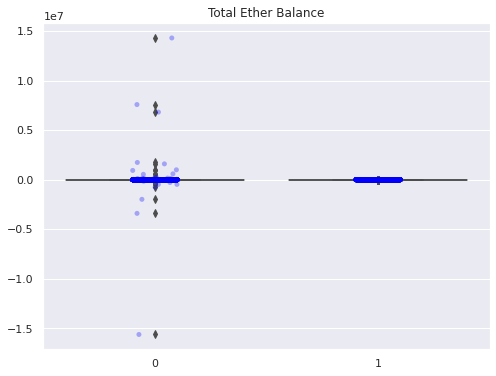

'total ether balance'

In [22]:
JitterBoxPlot(16)

In [23]:
print(positiveCases.shape, negativeCases.shape)

negativeCases = negativeCases[negativeCases['total ether balance'] <= 1.0e7]
negativeCases = negativeCases[negativeCases['total ether balance'] >= -1.5e7]

positiveCases.shape, negativeCases.shape

(2155, 22) (6291, 22)


((2155, 22), (6289, 22))

## Combining the two dataframes back together.

In [24]:
df = pd.concat([positiveCases, negativeCases])
df.shape

(8444, 22)

# Data Preparation.

## Over Sampling.

In [25]:
from imblearn.over_sampling import SMOTE
# Initialising SMOTE.
oversample = SMOTE()

# Generating the initial X and Y.
X = df.drop(columns = 'flag')
Y = df['flag']

# Train/test split with a test size of 20%
train_X, val_X, train_y, val_y = train_test_split(X, Y, test_size = 0.2, shuffle = True)

# To show the initial shape of the training data.
print(f'Shape of the training before SMOTE: {train_X.shape, train_y.shape}')

# Performing oversampling.
train_X_over, train_y_over = oversample.fit_resample(train_X, train_y)

# To show the shape of the training data after oversampling.
print(f'Shape of the training after SMOTE: {train_X_over.shape, train_y_over.shape}')

Shape of the training before SMOTE: ((6755, 21), (6755,))
Shape of the training after SMOTE: ((10022, 21), (10022,))


Accuracy: 98.76%


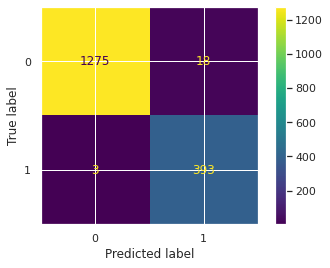

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Initialising the RandomForestClassifier.
rf = RandomForestClassifier()

# Fitting the random forest.
rf.fit(train_X_over, train_y_over)

# Model prediction.
test_prediction = rf.predict(val_X)

# Evaluation.
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_prediction, val_y)
print(f'Accuracy: {acc:,.2%}')

# Confusion Matrix.
cmd = ConfusionMatrixDisplay(confusion_matrix(test_prediction, val_y))
cmd.plot()

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# XGBoost Hyperparameters.
params_grid = {'learning_rate':[0.01, 0.1, 0.5],
              'n_estimators':[100, 200, 300],
              'subsample':[0.3, 0.5, 0.9],
               'max_depth':[3, 4, 5],
               'colsample_bytree':[0.5, 0.7]}

# Initialising the XGBoostClassifier
xg = XGBClassifier()

# Initialising the grid search.
grid = GridSearchCV(estimator = xg, param_grid = params_grid, scoring='recall', cv = 5, verbose = 0)

# Executing hyperparameter tuning.
grid.fit(train_X_over, train_y_over)
print(f'Best params found for XGBoost are: {grid.best_params_}')
print(f'Best recall obtained by the best params: {grid.best_score_}')

Best params found for XGBoost are: {'colsample_bytree': 0.7, 'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.9}
Best recall obtained by the best params: 0.989824140353391


{'colsample_bytree': 0.7, 'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.9}

Accuracy: 99.11%


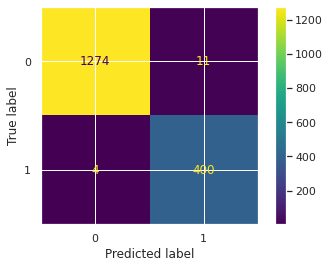

In [29]:
# Initialising the XGBoostClassifier with the best parameters.
xg = grid.best_estimator_

# Fitting the model to the oversampled training data.
xg.fit(train_X_over, train_y_over)

# Model prediction.
test_prediction = grid.best_estimator_.predict(val_X)

# Evaluation
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_prediction, val_y)
print(f'Accuracy: {acc:,.2%}')

# Confusion Matrix.
cmd = ConfusionMatrixDisplay(confusion_matrix(test_prediction, val_y))
cmd.plot()